Epoch #1, current mse is 422.47740188480714
Epoch #2, current mse is 258.3706104364132
Epoch #3, current mse is 158.0829759196518
Epoch #4, current mse is 96.795294890977
Epoch #5, current mse is 59.34053403272157
Epoch #6, current mse is 36.450108139921774
Epoch #7, current mse is 22.459977896672015
Epoch #8, current mse is 13.908844576419833
Epoch #9, current mse is 8.681505814478992
Epoch #10, current mse is 5.485359704100239
Epoch #11, current mse is 3.530496072818647
Epoch #12, current mse is 2.334200031179757
Epoch #13, current mse is 1.601483950650024
Epoch #14, current mse is 1.152080469315847
Epoch #15, current mse is 0.8758278651002748
Epoch #16, current mse is 0.7054060252025797
Epoch #17, current mse is 0.5996753773762452
Epoch #18, current mse is 0.5334952988171755
Epoch #19, current mse is 0.4915021384827021
Epoch #20, current mse is 0.4643069620280089
Epoch #21, current mse is 0.4461719909756627
Epoch #22, current mse is 0.4335906729954414
Epoch #23, current mse is 0.424

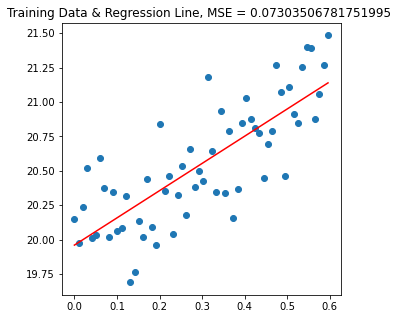

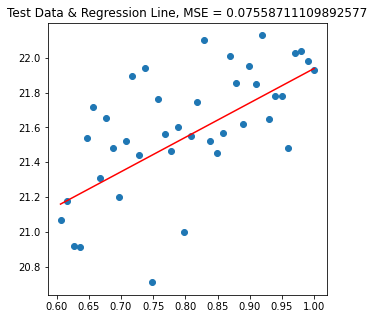

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5) # ширина, высота в дюймах

class DataModel2D: 
    def __init__(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        
class LinearRegression:
    def __init__(self, num_epochs, l_rate, stop_condition):
        self.epochs = num_epochs
        self.l_rate = l_rate 
        self.c = 0 # intercept
        self.m = 0 # slope
        self.error = float('inf')
        self.stop_condition = stop_condition  
        
    def mse(self, expected, predicted):
        mse = np.square(np.subtract(expected,predicted)).mean()
        self.error = mse
        return mse
    
    def gradient_m(self, inputs, expected, predicted):
        gm = (-2/inputs.shape[0]) * sum(inputs * (expected - predicted))
        return gm
    def gradient_c(self, expected, predicted):
        gc = np.subtract(expected,predicted).mean() * (-2)
        return gc  
    
    def learn(self,data_model):
        for i in range(self.epochs):
            predicted = self.m * data_model.x + self.c

            current_mse = self.mse(data_model.y, predicted)
            print(f"Epoch #{i + 1}, current mse is {current_mse}")

            self.m -= self.l_rate * self.gradient_m(data_model.x, data_model.y, predicted)
            self.c -= self.l_rate * self.gradient_c(data_model.y, predicted)

            if current_mse < self.stop_condition:
                print(f"current mse is smaller than {self.stop_condition}, exiting learning loop.")
                print(f"learning process took {i + 1} epochs")
                break
                
    def predict_single(self, x):
        return self.m * x + self.c

    def predict(self, x):
        predicted = self.m * x + self.c
        return DataModel2D(x, predicted)
    

def isFloat(x):
    try:
        float(x)
        return True
    except ValueError:
        False
        
def readCsv(path):
    x = []
    y = []
    with open(path) as f:
        reader = csv.reader(f)
        for row in reader:
            if isFloat(row[1]) and isFloat(row[2]):
                x.append(float(row[1]))
                y.append(float(row[2]))
    return DataModel2D(x, y)


def main():
    training_data = readCsv("lab_1_train.csv")
    lr = LinearRegression(5000, 0.1, 0.01)
    lr.learn(training_data)
    
    td_min_x = min(training_data.x)
    td_max_x = max(training_data.x)
    
    plt.title(f"Training Data & Regression Line, MSE = {lr.error} ")
    f1 = plt.figure(1)
    plt.scatter(training_data.x, training_data.y)
    plt.plot([td_min_x,td_max_x], [lr.predict_single(td_min_x), lr.predict_single(td_max_x)], 'r')
    
    test_data = readCsv("lab_1_test.csv")
    f2 = plt.figure(2)

    predicted_dm = lr.predict(test_data.x)
    test_mse = lr.mse(test_data.y, predicted_dm.y)
    plt.title(f"Test Data & Regression Line, MSE = {lr.error}")
    plt.scatter(test_data.x, test_data.y)
    pred_min_x = min(predicted_dm.x)
    pred_max_x = max(predicted_dm.x)
    plt.plot([pred_min_x, pred_max_x], [lr.predict_single(pred_min_x), lr.predict_single(pred_max_x)], 'r')
    plt.show()
    
if __name__ == "__main__":
    main()